# KNN algorithim
> a simple knn algo implementation

- date: 2018-08-10
- toc: true
- tags: [algorithims]

In [1]:
#hide
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

K Nearest Neighbours is a algorithim for finding out the similarity or distance b/w two things, to find out how alike/different they are. 

Say we have a bunch of fruit, KNN will classify them into clusters by using what we know - with fruit this would be shape, size, weight, color, etc.

Anyways, lets start with the Iris dataset, which has 150 measurements of flowers:

In [2]:
iris = sns.load_dataset("iris")
print(f"Iris dataset shape: {iris.shape}")
iris.head()

Iris dataset shape: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now I'm sampling 5 random flowers from this data set so we can use our fancy new KNN algo to determine what kind of flower they are later on:

In [3]:
test = iris.sample(n=5)
test

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
4,5.0,3.6,1.4,0.2,setosa
104,6.5,3.0,5.8,2.2,virginica
147,6.5,3.0,5.2,2.0,virginica
69,5.6,2.5,3.9,1.1,versicolor


And here I am deleting the sampled flowers from the iris dataset to make sure our algo hasn't seem the test flowers:

In [4]:
iris.drop(test.index, inplace=True)
print(iris.shape)

(145, 5)


Now to look at the data visually:

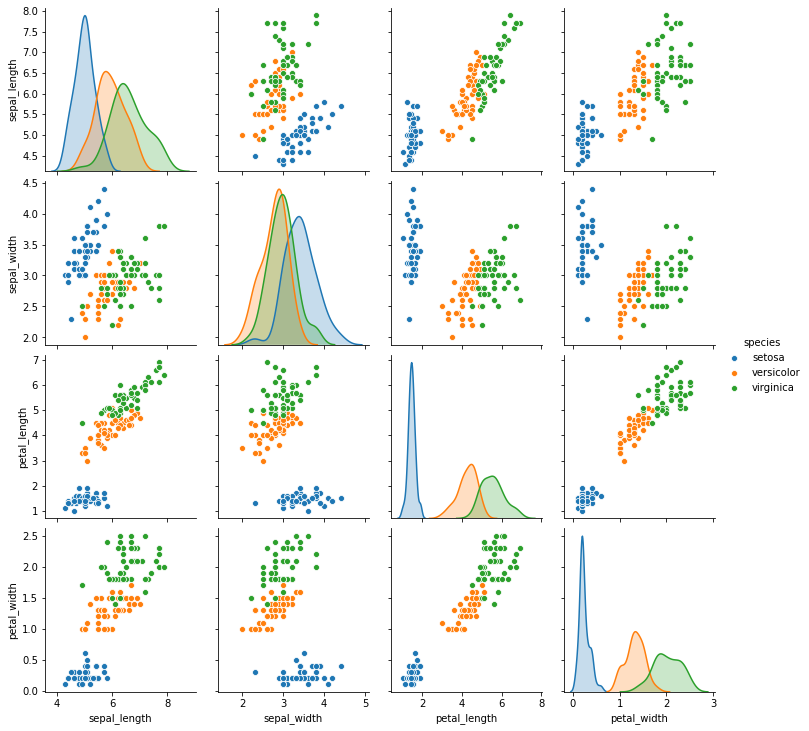

In [5]:
sns.pairplot(data=iris, hue="species");

It's pretty clear the the species are different, though there is some overlap at the boundaries.

Looking at petal length variation across species:

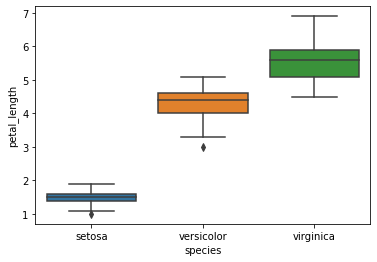

In [6]:
sns.boxplot(x="species", y="petal_length", data=iris);

Now to actually write the algorithim and figure out what species the flowers in the test data set belong to.

First, a helper function to calculate the distance b/w points:

In [7]:
def distance(x, y):
    """returns distance b/w two points x and y"""
    assert len(x) == len(y)
    inner = 0
    for a, b in zip(x,y):
        inner += (a - b)**2
    return np.sqrt(inner)
    
distance((1,5),[5,5])

4.0

lets look at the values of the first flower in our test data and see if we can figure out what it is by using KNN:

In [9]:
test.iloc[0]

sepal_length          5.8
sepal_width           2.7
petal_length          5.1
petal_width           1.9
species         virginica
Name: 101, dtype: object

In [10]:
def knn(item, data, n=3):
    """takes in an item to check and a dataset, of size 4 features each
    returns the first n closest neighbours as a tuple (loc, distance)"""
    dist = []
    for i, row in data.iterrows():
        dist.append((i, distance(row[:4], item)))
        
    nearest = sorted(dist, key=lambda x: x[1])[:n]
    species = [iris.loc[i[0]]["species"] for i in nearest]
    
    return Counter(species).most_common()[0][0]

knn(test.iloc[0][:4], iris)

'virginica'

In [11]:
knn_species = []
for i, row in test.iterrows():
    knn_species.append(knn(row[:4], iris))
knn_species

['virginica', 'setosa', 'virginica', 'virginica', 'versicolor']

In [12]:
test["knn"] = knn_species
test

,sepal_length,sepal_width,petal_length,petal_width,species,knn
101,5.8,2.7,5.1,1.9,virginica,virginica
4,5.0,3.6,1.4,0.2,setosa,setosa
104,6.5,3.0,5.8,2.2,virginica,virginica
147,6.5,3.0,5.2,2.0,virginica,virginica
69,5.6,2.5,3.9,1.1,versicolor,versicolor


All right! our KNN algo got all the 5 test species right!

I wrote this KNN algo a bit specifically targeting the iris dataset, but it can be modified to deal with with many different data sets.

The iris dataset is very simple, but usually I would normalize the data so all the attributes get a chance to effect the rating. 